In [1]:
#1. Add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
data = pd.read_csv('acb.csv')
data

,Date,Price,Open,High,Low,Mass,% change
0,02/01/2018,11615.4,11076.6,11645.3,11016.7,12.22M,5.15%
1,03/01/2018,11585.5,11615.4,11705.2,11375.9,16.89M,-0.26%
2,04/01/2018,11615.4,11585.5,11645.3,11495.7,21.26M,0.26%
3,05/01/2018,11615.4,11675.3,11825.0,11495.7,21.56M,0.00%
4,08/01/2018,12004.6,11615.4,12004.6,11615.4,12.96M,3.35%
...,...,...,...,...,...,...,...
1480,11/12/2023,22400.0,22450.0,22500.0,22250.0,2.27M,0.00%
1481,12/12/2023,22500.0,22450.0,22500.0,22300.0,3.23M,0.45%
1482,13/12/2023,22300.0,22500.0,22550.0,22300.0,3.93M,-0.89%
1483,14/12/2023,22500.0,22400.0,22750.0,22300.0,6.95M,0.90%


In [3]:
# Xử lý dữ liệu
prices = data['Price']

In [4]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [5]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [6]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [7]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [8]:
X_train.shape

(1009, 30, 1)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_steps,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100

16/16 [==============================] - 4s 16ms/step - loss: 0.0420
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 0.0053
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0020
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 6/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 7/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 8/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 9/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 10/100
16/16 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 11/100
16/16 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 12/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 13/100
16/16 [====

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

13/13 [==============================] - 1s 5ms/step
[[1486]
 [1487]
 [1488]
 [1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]]
1/1 [==============================] - 0s 19ms/step
[22281.768 22501.576 22586.264 22531.797 22758.422 22874.896 22810.543
 22737.832 22822.6   23185.367 23503.94  23368.104 23041.555 22870.338
 22897.258 22756.732 22554.945 22351.139 22273.396 22351.506 22403.3
 22411.928 22553.475 22605.516 22650.56  22712.26  22743.615 22742.406
 22773.523 22712.072]


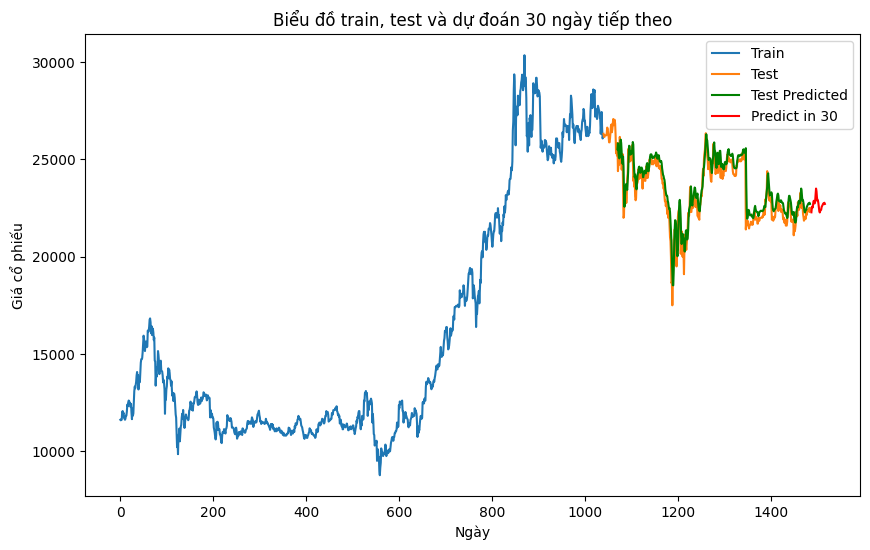

In [13]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




13/13 [==============================] - 0s 5ms/step


In [15]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 2.165
MAE: 490.812
RMSE: 641.523
MSLE: 0.028
-------------------
